In [1]:
import pandas as pd
import numpy as np
import json
import pickle
import matplotlib.pyplot as plt
import re
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import ast

# Data

In [2]:
# the data

df = pd.read_csv(r"C:\Users\conix\Dropbox\FNRS project taxonomy\methods in taxonomy\coding_trial\testData2711.csv")
df = df.drop(columns = 'Unnamed: 0')
df.head(2)

,PHENOTYPE,Phen_data,MORPH,quant_morph,interbr_morph,qual_morph,color_pattern,shape,texture,ultrastruct,...,phylogenetic,specimen_storage_loc,sampling_loc,abbrev_terms,nomenclat_history,biogeo,id,displayed_text,checked,batch
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,./Corpus/EJT/10_5852_ejt_2021_735_1243.json_0,The material examined was collected in fragmen...,0,batch1
1,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,./Corpus/Zootaxa/1/zootaxa_1920_1_5.json_0,Invertebrate samples\nwere collected using a h...,0,batch1


In [3]:
# add paper level column, and make paper level df

df['paper'] = [i.split('.json')[0] for i in df['id'].values]
# Group by 'paper' and take the maximum for each category
paper_df = df.groupby('paper', as_index=False).agg({i: 'max' for i in df.columns[:-5]})


# Explore data


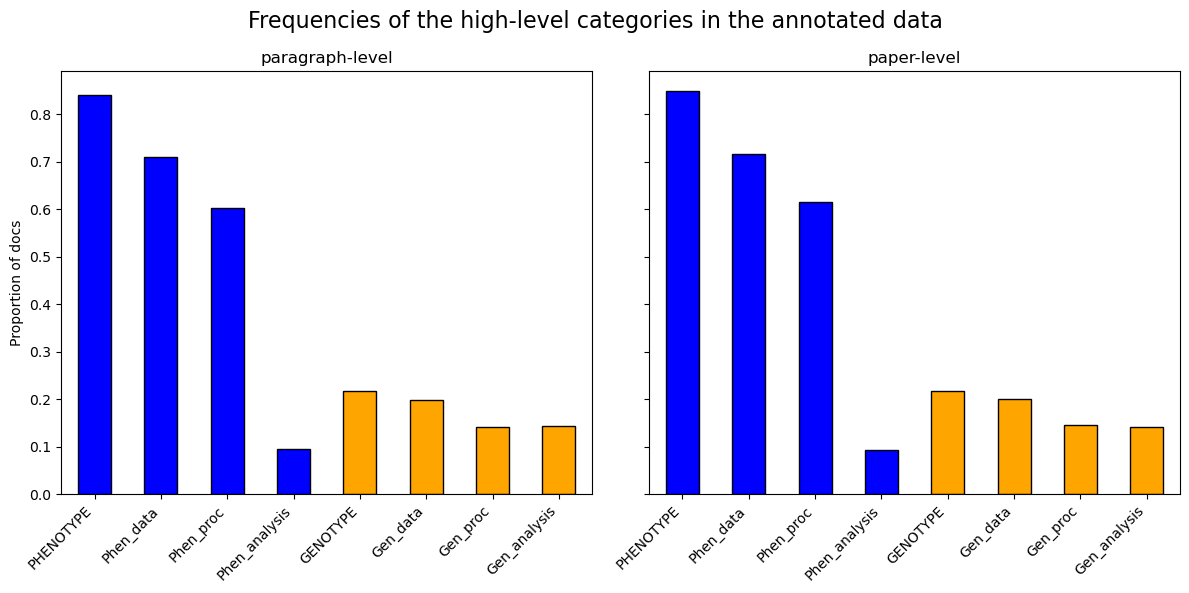

In [4]:
# check frequencies of high level classification

high_level = ['PHENOTYPE','Phen_data','Phen_proc','Phen_analysis','GENOTYPE','Gen_data','Gen_proc','Gen_analysis']
series1 = df[high_level].sum(axis = 0) / len(df)
series2 = paper_df[high_level].sum(axis = 0) / len(paper_df)
# Define bar colors
colors = ['blue'] * 4 + ['orange'] * 4  # First 4 bars are blue, others are orange

# Create subplots for side-by-side barplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

# Plot first series
series1.plot(kind='bar', color=colors, edgecolor='black', ax=axes[0])
axes[0].set_title('paragraph-level')
axes[0].set_ylabel('Proportion of docs')
axes[0].set_xticklabels(series1.index, rotation=45, ha='right')

# Plot second series
series2.plot(kind='bar', color=colors, edgecolor='black', ax=axes[1])
axes[1].set_title('paper-level')
axes[1].set_xticklabels(series2.index, rotation=45, ha='right')

# Add overall title and adjust layout
fig.suptitle('Frequencies of the high-level categories in the annotated data', fontsize=16)
plt.tight_layout()
plt.show()

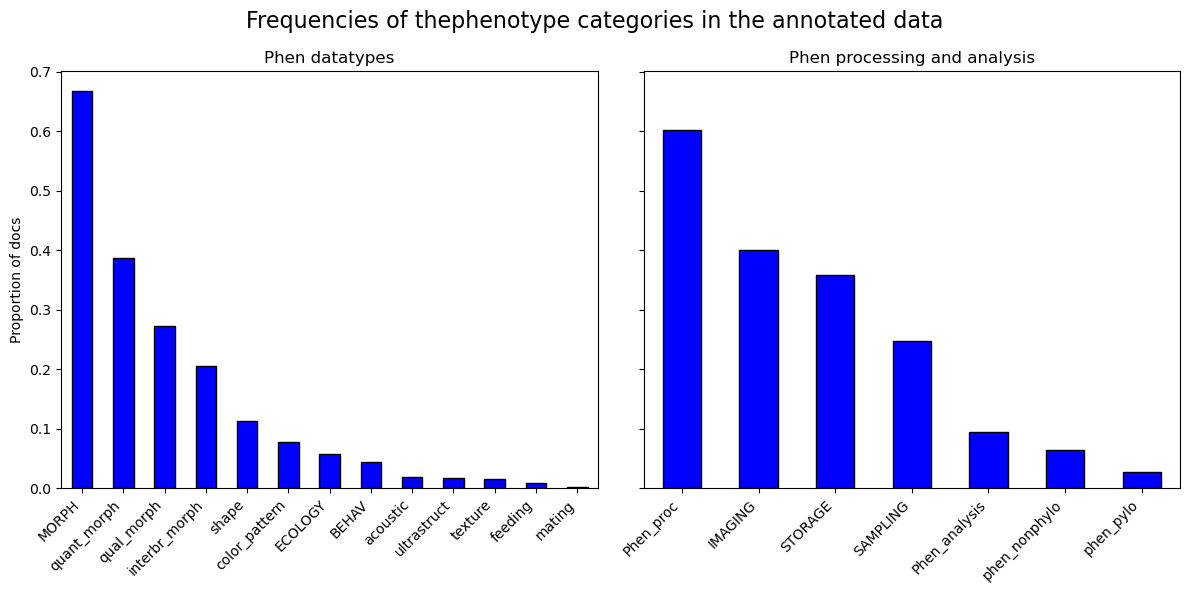

In [5]:
# check frequencies of high level classification

phen1 = [
 'MORPH',
 'quant_morph',
 'interbr_morph',
 'qual_morph',
 'color_pattern',
 'shape',
 'texture',
 'ultrastruct',
 'BEHAV',
 'acoustic',
 'feeding',
 'mating',
 'ECOLOGY',
]
phen2 = [ 'Phen_proc',
 'IMAGING',
 'SAMPLING',
 'STORAGE',
 'Phen_analysis',
 'phen_nonphylo',
 'phen_pylo']

series1a = (df[phen1].sum(axis = 0) / len(df)).sort_values(ascending = False)
series1b = (df[phen2].sum(axis = 0) / len(df)).sort_values(ascending = False)




# Create subplots for side-by-side barplots
fig, axes = plt.subplots(1, 2, figsize=(12,6), sharey=True)

# Plot first series
series1a.plot(kind='bar', color='blue', edgecolor='black', ax=axes[0])
axes[0].set_title('Phen datatypes')
axes[0].set_ylabel('Proportion of docs')
axes[0].set_xticklabels(series1a.index, rotation=45, ha='right')

# Plot second series
series1b.plot(kind='bar', color='blue', edgecolor='black', ax=axes[1])
axes[1].set_title('Phen processing and analysis')
axes[1].set_xticklabels(series1b.index, rotation=45, ha='right')

# Add overall title and adjust layout
fig.suptitle('Frequencies of thephenotype categories in the annotated data', fontsize=16)
plt.tight_layout()
plt.show()

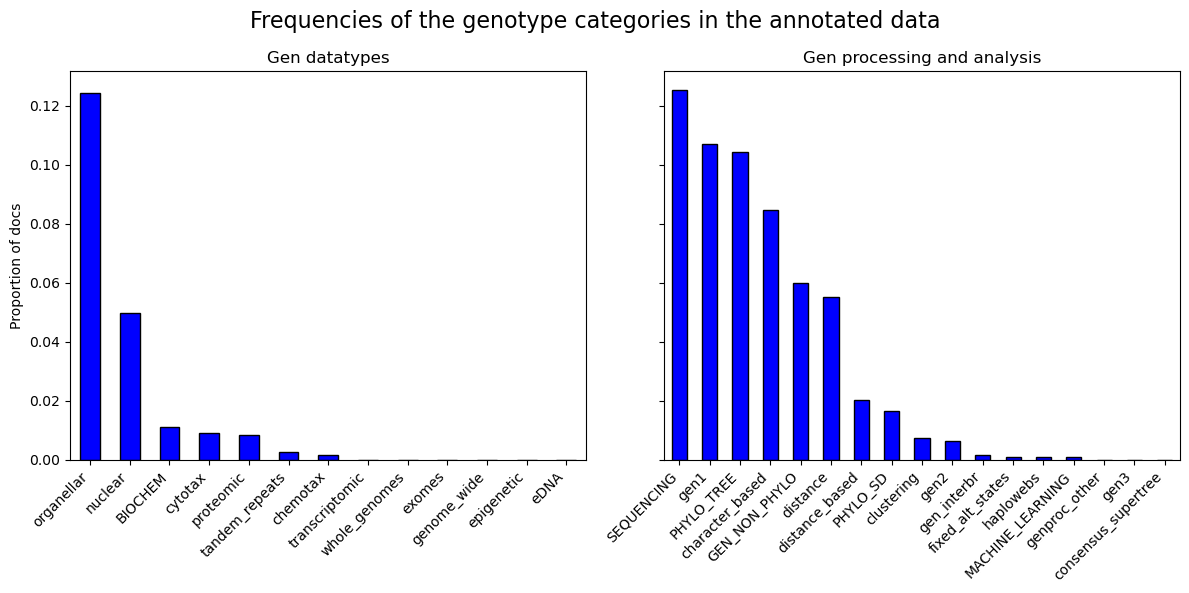

In [6]:
# check frequencies of high level classification

gen1 = [
 
 'nuclear',
 'organellar',
 'transcriptomic',
 'proteomic',
 'tandem_repeats',
 'whole_genomes',
 'exomes',
 'genome_wide',
 'epigenetic',
 'eDNA',
 'BIOCHEM',
 'chemotax',
 'cytotax',
 

]
gen2 = ['SEQUENCING',
 'gen1',
 'gen2',
 'gen3',
 'genproc_other',
 'GEN_NON_PHYLO',
 'distance',
 'haplowebs',
 'fixed_alt_states',
 'clustering',
 'gen_interbr',
 'PHYLO_SD',
 'PHYLO_TREE',
 'distance_based',
 'character_based',
 'consensus_supertree',
 'MACHINE_LEARNING']

series1a = (df[gen1].sum(axis = 0) / len(df)).sort_values(ascending = False)
series1b = (df[gen2].sum(axis = 0) / len(df)).sort_values(ascending = False)


# Create subplots for side-by-side barplots
fig, axes = plt.subplots(1, 2, figsize=(12,6), sharey=True)

# Plot first series
series1a.plot(kind='bar', color='blue', edgecolor='black', ax=axes[0])
axes[0].set_title('Gen datatypes')
axes[0].set_ylabel('Proportion of docs')
axes[0].set_xticklabels(series1a.index, rotation=45, ha='right')

# Plot second series
series1b.plot(kind='bar', color='blue', edgecolor='black', ax=axes[1])
axes[1].set_title('Gen processing and analysis')
axes[1].set_xticklabels(series1b.index, rotation=45, ha='right')

# Add overall title and adjust layout
fig.suptitle('Frequencies of the genotype categories in the annotated data', fontsize=16)
plt.tight_layout()
plt.show()

In [7]:
# df.loc[df['SAMPLING'] == 1].displayed_text.values 

# Regex check

In [34]:
# load regex patterns
# these have been made on the basis of coding trials, as well as some gpt help

filepath = r"C:\Users\conix\Dropbox\FNRS project taxonomy\methods in taxonomy\data\regex_patterns.txt"
with open(filepath, 'r') as file:
    content = file.read()
regex_patterns = ast.literal_eval(content)


In [11]:
# check whether the regex patterns are all good
def find_unbalanced_patterns(patterns):
    for category, regex_list in regex_patterns.items():
        for pattern in regex_list:
            try:
                re.compile(pattern)  # Attempt to compile the regex
            except re.error as e:
                print(f"Error in category '{category}', pattern '{pattern}': {e}")

# Run the checker
find_unbalanced_patterns(regex_patterns)

In [13]:
# Function to classify based on regex
def classify_text(text, patterns):
    """
    Classifies text based on a list of regex patterns.
    
    Args:
        text (str): The input text to classify.
        patterns (list of str): A list of regex patterns for the category.
        
    Returns:
        int: 1 if any pattern matches, 0 otherwise.
    """
    for pattern in patterns:
        if re.search(pattern, text, flags=re.IGNORECASE):
            return 1
    return 0

# function to evaluate the regex pattern classifier
def evaluate_categories(df, categories):
    """
    Evaluates precision, recall, F1-score, and accuracy for multiple categories.
    
    Args:
        df (DataFrame): The DataFrame containing ground truth and predictions.
        categories (list): A list of category names to evaluate.
        
    Returns:
        DataFrame: A DataFrame with precision, recall, F1-score, accuracy, and support for each category.
    """
    results = []

    for category in categories:
        y_true = df[category]
        y_pred = df[f"{category}_predicted"]
        
        precision = precision_score(y_true, y_pred, zero_division=0)
        recall = recall_score(y_true, y_pred, zero_division=0)
        f1 = f1_score(y_true, y_pred, zero_division=0)
        accuracy = accuracy_score(y_true, y_pred)
        support = y_true.sum()  # Number of true positive instances in the category
        
        results.append({
            "Category": category,
            "Precision": precision,
            "Recall": recall,
            "F1-Score": f1,
            "Accuracy": accuracy,
            "Support": support
        })
    
    # Convert results into a DataFrame
    results_df = pd.DataFrame(results)
    return results_df

In [35]:
# Apply regex classification to each category
for category, patterns in regex_patterns.items():
    df[f"{category}_predicted"] = df["displayed_text"].apply(lambda text: classify_text(text, patterns))

In [36]:


df_res = evaluate_categories(df, list(regex_patterns.keys()))
df_res = df_res.loc[(df_res.Support > 10) & (df_res.Precision > 0)].iloc[:,:6]
df_res
styled_df = df_res.style.background_gradient( cmap='coolwarm')
styled_df

,Category,Precision,Recall,F1-Score,Accuracy,Support
0,quant_morph,0.765049,0.940334,0.843683,0.865438,419
1,interbr_morph,0.857820,0.815315,0.836028,0.934562,222
2,color_pattern,0.539216,0.647059,0.588235,0.929032,85
3,shape,0.620000,0.254098,0.360465,0.898618,122
4,texture,0.500000,0.562500,0.529412,0.985253,16
6,acoustic,0.666667,1.000000,0.800000,0.990783,20
9,ECOLOGY,0.363636,0.193548,0.252632,0.934562,62
10,IMAGING,0.886525,0.862069,0.874126,0.900461,435
11,SAMPLING,0.836957,0.287313,0.427778,0.810138,268
12,STORAGE,0.746411,0.802057,0.773234,0.831336,389


In [32]:
# function to check metrics for individual terms, use this to finetune
def evaluate_terms(df, patterns, categories):
    """
    Evaluates precision for each regex term in the specified categories.

    Args:
        df (DataFrame): The DataFrame containing text and true labels.
                       Must have columns "text" and "label".
        patterns (dict): Dictionary where keys are categories and values are lists of regex patterns.
        categories (list): A list of category names to evaluate.

    Returns:
        dict: A dictionary with precision scores for each term in the specified categories.
    """
    from sklearn.metrics import precision_score

    precision_results = {}

    for category in categories:
        if category not in patterns:
            raise ValueError(f"Category '{category}' is not in the patterns dictionary.")

        precision_results[category] = {}

        for term in patterns[category]:
            # Classify texts for the specific term
            df[f"{category}_term"] = df["displayed_text"].apply(
                lambda text: 1 if re.search(term, text, flags=re.IGNORECASE) else 0
            )

            # Get true labels and predictions for this term
            y_true = (df[category]).astype(int)  # 1 for true category matches, 0 otherwise
            y_pred = df[f"{category}_term"]

            # Calculate precision
            precision = precision_score(y_true, y_pred, zero_division=0)
            # recall = recall_score(y_true, y_pred, zero_division=0)
            # f1 = f1_score(y_true, y_pred, zero_division=0)
            precision_results[category][term] = precision

        # Drop the temporary column to keep the DataFrame clean
        df.drop(columns=[f"{category}_term"], inplace=True)

    return precision_results



def remove_terms(dct):
    exclude = []
    for term, result in dct.items():
        
        if (result > 0) & (result < 0.6):
            exclude.append(term)
    return exclude

dct = evaluate_terms(df, regex_patterns, ['shape'])

remove_terms(dct['shape'])

['\\bshape\\b',
 '\\bform\\b',
 '\\bopposite\\b',
 '\\badjacent\\b',
 '\\bcylindrical\\b',
 '\\brectangular\\b',
 '\\bsquare\\b',
 '\\bflat\\b']

In [33]:
dct

{'shape': {'\\bshape\\b': 0.5853658536585366,
  '\\boutline\\b': 0.0,
  '\\bform\\b': 0.3333333333333333,
  '\\bcontour\\b': 0.6666666666666666,
  '\\bbesides\\b': 0.0,
  '\\bopposite\\b': 0.4,
  '\\badjacent\\b': 0.1875,
  '\\brounded\\b': 0.68,
  '\\bcircular\\b': 0.0,
  '\\boval\\b': 1.0,
  '\\belliptical\\b': 0.0,
  '\\boblong\\b': 0.0,
  '\\bspherical\\b': 1.0,
  '\\bconical\\b': 0.8333333333333334,
  '\\bcylindrical\\b': 0.3333333333333333,
  '\\btapered\\b': 1.0,
  '\\btriangular\\b': 0.8571428571428571,
  '\\bpyramidal\\b': 0.0,
  '\\brectangular\\b': 0.3333333333333333,
  '\\bsquare\\b': 0.10344827586206896,
  '\\bcurved\\b': 0.7857142857142857,
  '\\bangular\\b': 0.6666666666666666,
  '\\bflat\\b': 0.36363636363636365,
  '\\blobed\\b': 0.0,
  '\\bindented\\b': 1.0}}